Assignment-4 Neural Networks and Deep Learning

Name:Ram Janam Yadav Roll No. 181EC136

Name:Manjeet Kumar Roll No. 181EC123

Name:Shiva Kumar Roll No. 181EC244

Q.1.(i) Write python code for plotting the following activation functions and their derivative for the input x in the range of -20 to 20.
(a) ReLU (e) Lekay ReLU (c) Parametric ReLU (d) Exponential ReLU(ELU) (e) Scaled Exponential Linear Units (SELU) (f) SoftPlus (Smooth ReLU)

(ii) Write python from scratch for 2D Linear convolution between input=np.array([[1,2,3],[4,5,6],[7,8,9]])and filter=np.array([[1,2,1],[0,0,0],[-1,-2,-1]]) 
(b).Write python from scratch for 2D Linear convolution by Toeplitz matrix method between input image(lena.jpg) and kernel = np.array([[1, 2, 1],[2, 4, 2],[1, 2, 1]]))/16 
(c) Compute number of multiplications and parameters required for 2D Linear Convolution in part (a) and part(b) 
(d) Apply Max pooling and Average pooling on convoled image in part (b)

(iii) (a)Write python from scratch for 2D Spatial Separbale convolution between input image(lena.jpg) and Gausian filter = np.array([1,4,6,4,1],[4,16,24,16,4],[6,24,36,24,6],[4,16,24,16,4],[1,4,6,4,1])/256 (b) Compute number of multiplications and parameters required for2D Spatial Separbale convolution

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
class ActivationFunctions:
    def __init__(self,x):
        self.x = x
        
    def Relu(self):
        x1 = list()
        for i in self.x:
            if i>0:
                x1.append(i)
            else:
                x1.append(0)
        return x1
    
    def derRelu(self):
        res = list()
        for i in self.x:
            if(i>0):
                res.append(1)
            else:
                res.append(0)
        return res
    
    def leakyRelu(self):
        x1 = list()
        for i in self.x:
            if(i>0):
                x1.append(i)
            
            else:
                x1.append(0.01*i)
        return x1
    
    def derleakyRelu(self):
        res = list()
        for i in self.x:
            if(i>0):
                res.append(1)
            else:
                res.append(0.01)
        return res
    
    def parametricRelu(self,alpha=0.1):
        res = list()
        for i in self.x:
            if(i<0):
                res.append(alpha*i)
            else:
                res.append(i)
        return res
    
    def derparametricRelu(self,alpha=0.1):
        res = list()
        for i in self.x:
            if(i<0):
                res.append(alpha)
            else:
                res.append(1)
        return res
    
    def exponentialRelu(self,alpha=0.1):
        res = list()
        for i in self.x:
            if(i>0):
                res.append(i)
            else:
                res.append(alpha*(np.exp(i)-1))
        return res
    
    def derexpRelu(self,alpha=0.1):
        res = list()
        for i in self.x:
            if(i>0):
                res.append(i)
            else:
                res.append(alpha*(np.exp(i)))
        return res
    
    def selu(self,alpha=1.6733,lamda=1.0507):
        res = list()
        for i in self.x:
            if(i<0):
                res.append(lamda*alpha*(np.exp(i)-1))
            else:
                res.append(lamda*i)
        return res
    
    def derselu(self,alpha=1.6733,lamda=1.0507):
        res = list()
        for i in self.x:
            if(i<0):
                res.append(lamda*alpha*(np.exp(i)))
            else:
                res.append(lamda)
        return res
    
    def softplus(self):
        res = list()
        for i in self.x:
            res.append(math.log(1+np.exp(i)))
        return res
    
    def dersoftplus(self):
        res = list()
        for i in self.x:
            t = np.exp(i)
            res.append(t/(1+t))
        return res

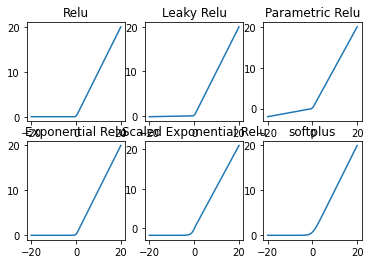

In [3]:
x = np.linspace(-20, 20)
activation_fn = ActivationFunctions(x)
figure, axis = plt.subplots(2, 3)
axis[0, 0].plot(x, activation_fn.Relu())
axis[0, 0].set_title("Relu")
axis[0, 1].plot(x, activation_fn.leakyRelu())
axis[0, 1].set_title("Leaky Relu")
axis[0, 2].plot(x, activation_fn.parametricRelu())
axis[0, 2].set_title("Parametric Relu")
axis[1, 0].plot(x, activation_fn.exponentialRelu())
axis[1, 0].set_title("Exponential Relu")
axis[1, 1].plot(x, activation_fn.selu())
axis[1, 1].set_title("Scaled Exponential Relu")
axis[1, 2].plot(x, activation_fn.softplus())
axis[1, 2].set_title("softplus")
plt.show()

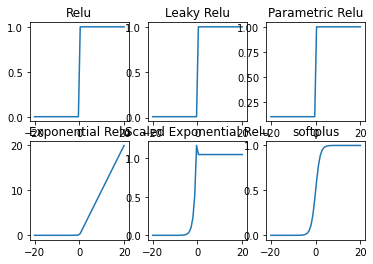

In [4]:
figure, axis = plt.subplots(2, 3)
axis[0, 0].plot(x, activation_fn.derRelu())
axis[0, 0].set_title("Relu")
axis[0, 1].plot(x, activation_fn.derleakyRelu())
axis[0, 1].set_title("Leaky Relu")
axis[0, 2].plot(x, activation_fn.derparametricRelu())
axis[0, 2].set_title("Parametric Relu")
axis[1, 0].plot(x, activation_fn.derexpRelu())
axis[1, 0].set_title("Exponential Relu")
axis[1, 1].plot(x, activation_fn.derselu())
axis[1, 1].set_title("Scaled Exponential Relu")
axis[1, 2].plot(x, activation_fn.dersoftplus())
axis[1, 2].set_title("softplus")
plt.show()

Q. 2. Build a CNN(LeNet5) model from scratch to recognize handwritten digit from the optical handwritten digit dataset (Use Sklearn Dataset and split dataset into training dataset (80%) and testing dataset (20%) ). Use a Stochastic gradient descent algorithm to learn model with parameters for α = 0.01 and random parameters of the CNN model for (a) Softmax loss function (b) Focal loss function.
(i) Plot a comparative loss curve for at least 200 epochs.

(ii) Print confusion matrix, calculate classification metrics such as precision, recall, f1-score and accuracy on test datset and ROC curve for each loss function.

(iii) Repeat part (i) to (ii) using an Adam gradient descent algorithm

(iv) Implement above CNN model with Keras/Tensorflow/Pytorch Library and verify the above results.

In [5]:
import tensorflow as tf

In [6]:
from tensorflow import keras

In [7]:
from sklearn.datasets import load_digits

In [8]:
X, y = load_digits(return_X_y=True)
X = X[:1046]
y = y[:1046]

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)
print(X_test.shape)
X_train = X_train.reshape(784,8,8,1)
X_test = X_test.reshape(262,8,8,1)
y_train_hot = keras.utils.to_categorical(y_train, 10)
print('New y_train shape: ', y_train_hot.shape)
y_test_hot = keras.utils.to_categorical(y_test, 10)
print('New y_test shape: ', y_test_hot.shape)

(262, 64)
New y_train shape:  (784, 10)
New y_test shape:  (262, 10)


In [10]:
model = keras.Sequential()

model.add(keras.layers.Conv2D(filters=6, kernel_size=(3, 3), activation='relu', input_shape=(8,8,1)))
model.add(keras.layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu'))
model.add(keras.layers.AveragePooling2D())

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(units=120, activation='relu'))

model.add(keras.layers.Dense(units=84, activation='relu'))

model.add(keras.layers.Dense(units=10, activation = 'softmax'))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 6, 6, 6)           60        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 4, 4, 16)          880       
_________________________________________________________________
average_pooling2d (AveragePo (None, 2, 2, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 120)               7800      
_________________________________________________________________
dense_1 (Dense)              (None, 84)                10164     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                8

In [12]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history = model.fit(X_train,y_train,epochs=10)

Epoch 1/10
25/25 [==============================] - 0s 2ms/step - loss: 1.7835 - accuracy: 0.4847
Epoch 2/10
25/25 [==============================] - 0s 2ms/step - loss: 0.7719 - accuracy: 0.8151
Epoch 3/10
25/25 [==============================] - 0s 2ms/step - loss: 0.4419 - accuracy: 0.8699
Epoch 4/10
25/25 [==============================] - 0s 2ms/step - loss: 0.3045 - accuracy: 0.9094
Epoch 5/10
25/25 [==============================] - 0s 2ms/step - loss: 0.2214 - accuracy: 0.9324
Epoch 6/10
25/25 [==============================] - 0s 2ms/step - loss: 0.1845 - accuracy: 0.9401
Epoch 7/10
25/25 [==============================] - 0s 2ms/step - loss: 0.1357 - accuracy: 0.9630
Epoch 8/10
25/25 [==============================] - 0s 3ms/step - loss: 0.1133 - accuracy: 0.9707
Epoch 9/10
25/25 [==============================] - 0s 2ms/step - loss: 0.1156 - accuracy: 0.9707
Epoch 10/10
25/25 [==============================] - 0s 2ms/step - loss: 0.0924 - accuracy: 0.9770


In [13]:
y = model.predict(X_test)

In [14]:
y_pred = []
for l in y:
    y_pred.append(np.argmax(l))
print(np.array(y_pred))
print(y_test)

[4 3 8 5 4 3 4 7 3 3 3 4 3 8 5 9 3 2 9 2 8 0 3 0 1 1 9 9 8 7 5 6 0 3 2 3 0
 5 6 2 2 2 3 6 9 4 0 5 0 8 4 4 0 7 4 7 1 6 9 6 4 0 5 1 4 6 8 9 1 7 2 9 9 1
 8 3 1 5 8 1 5 0 4 4 1 9 1 2 7 2 8 2 5 7 5 9 1 1 9 8 0 8 6 0 6 5 5 4 4 2 2
 1 7 7 8 0 7 9 2 2 4 4 2 0 7 1 8 2 3 1 1 2 3 6 3 5 2 1 3 8 8 1 8 0 4 5 1 6
 0 5 6 3 6 6 3 5 4 7 2 8 9 6 6 4 8 4 7 1 3 4 2 5 6 7 2 4 8 4 6 6 3 9 4 6 1
 5 2 8 3 8 5 6 4 9 4 9 8 3 8 9 6 7 7 3 2 7 4 3 6 3 4 2 9 2 6 8 0 4 7 4 9 4
 2 6 3 8 6 9 7 9 4 9 8 4 8 5 3 6 9 4 7 1 5 6 0 6 4 8 0 5 1 1 8 5 1 9 8 9 2
 7 9 7]
[4 3 8 5 4 3 4 7 3 3 3 7 3 8 5 9 3 2 9 2 8 0 3 0 1 1 9 9 8 7 5 6 0 3 2 3 0
 5 6 2 2 2 3 6 1 4 0 5 0 7 4 4 0 7 4 7 1 6 9 6 4 0 5 1 7 6 8 1 1 7 2 9 9 1
 8 3 1 5 8 1 5 0 5 4 1 9 1 2 7 2 8 2 5 7 5 9 1 1 9 8 0 8 6 0 6 5 5 4 7 2 2
 1 7 7 8 0 7 9 2 2 4 4 2 0 7 1 8 2 3 1 1 2 3 6 3 5 2 1 3 8 8 7 8 0 4 5 1 6
 0 5 6 3 6 6 3 5 4 7 2 8 9 6 6 4 8 4 7 1 3 4 2 5 6 7 2 4 2 4 6 6 3 9 4 6 1
 5 2 8 3 8 5 6 4 9 4 9 8 3 8 9 6 7 7 3 2 7 4 3 6 3 4 2 9 2 6 8 0 4 7 4 9 4
 2 6 3 8 6 9 7 9 

In [15]:
# y_pred = cnn.predict(X_test)
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.1523095816373825
Test accuracy: 0.9580152630805969


dict_keys(['loss', 'accuracy'])


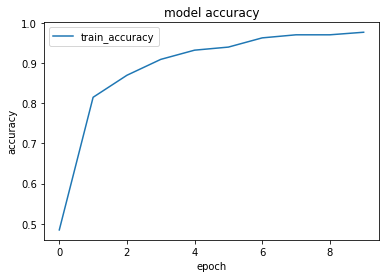

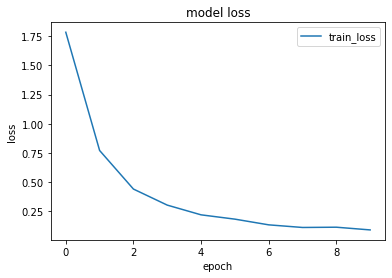

In [16]:
# Plot the model loss of the training data
print(history.history.keys())

#  "Training Accuracy"
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_accuracy'])
plt.show()

#"Training Loss"
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss'])
plt.show()

In [17]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[18  0  0  0  0  0  0  0  0  0]
 [ 0 24  0  0  0  0  0  0  0  2]
 [ 0  0 27  0  0  0  0  0  2  0]
 [ 0  0  0 27  0  0  0  0  0  0]
 [ 0  0  0  0 30  0  0  0  0  0]
 [ 0  0  0  0  1 23  0  0  0  0]
 [ 0  0  0  0  1  0 28  0  0  0]
 [ 0  1  0  0  3  0  0 22  1  0]
 [ 0  0  0  0  0  0  0  0 27  0]
 [ 0  0  0  0  0  0  0  0  0 25]]


In [18]:
from sklearn.metrics import classification_report,confusion_matrix
print("Performance Metrics: ")
metrics=classification_report(y_test,y_pred)
print(metrics)
print("Confusion Matrix: ")
CM=confusion_matrix(y_test,y_pred)
print(CM)

Performance Metrics: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       0.96      0.92      0.94        26
           2       1.00      0.93      0.96        29
           3       1.00      1.00      1.00        27
           4       0.86      1.00      0.92        30
           5       1.00      0.96      0.98        24
           6       1.00      0.97      0.98        29
           7       1.00      0.81      0.90        27
           8       0.90      1.00      0.95        27
           9       0.93      1.00      0.96        25

    accuracy                           0.96       262
   macro avg       0.96      0.96      0.96       262
weighted avg       0.96      0.96      0.96       262

Confusion Matrix: 
[[18  0  0  0  0  0  0  0  0  0]
 [ 0 24  0  0  0  0  0  0  0  2]
 [ 0  0 27  0  0  0  0  0  2  0]
 [ 0  0  0 27  0  0  0  0  0  0]
 [ 0  0  0  0 30  0  0  0  0  0]
 [ 0  0  0  0  1 23  0  0  0  0]
 [

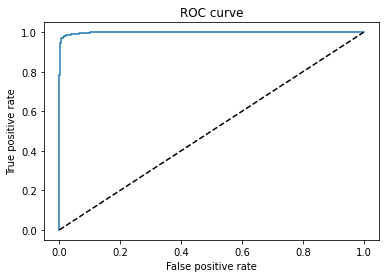

In [19]:
from sklearn.metrics import roc_curve, auc
y_pred = model.predict(X_test)
fpr, tpr, threshold = roc_curve(y_test_hot.ravel(), y_pred.ravel())
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.show()

Q.3. Build CNN(LeNet5) model from scratch to recognize diabetes-from Pima-Indians-diabetes-database (i.e. https://github.com/duonghuuphuc/keras/tree/master/dataset ). Use Adam gradient descent algorithm to learn model with parameters for α = 0.01 and random parameters of the CNN model for Binary cross entropy loss function.

(i) Visualize input dataset and Plot comparative loss curve for at least 200 epochs.

(ii) Print confusion matrix, calculate classification metrics such as precision, recall, f1-score and accuracy on test datset and ROC curve for each loss function.

(iii) Implement above CNN model with Keras/Tensorflow/Pytorch Library and verify the above results.

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
df = pd.read_csv('pima-indians-diabetes.csv')
df.head()

,6,148,72,35,0,33.6,0.627,50,1
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [22]:
from numpy import loadtxt
path = 'pima-indians-diabetes.csv'
dataset = loadtxt(path, delimiter=',')
X = dataset[:,0:8]
y = dataset[:,8]
print(X.shape)
print(y.shape)

(768, 8)
(768,)


In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
print(len(X_train))
print(len(y_test))
print(len(X_test))

614
154
154


In [24]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [25]:
y_train_hot = keras.utils.to_categorical(y_train, 2)
print('New y_train shape: ', y_train_hot.shape)
y_test_hot = keras.utils.to_categorical(y_test, 2)
print('New y_test shape: ', y_test_hot.shape)

New y_train shape:  (614, 2)
New y_test shape:  (154, 2)


In [26]:
model = keras.Sequential()
model.add(keras.layers.Dense(128,input_shape=(8,),activation='relu',
               name='dense_1'))
model.add(keras.layers.Dense(64,activation='relu',name='dense_2'))
model.add(keras.layers.Dense(2,activation='softmax',name='dense_output'))

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [27]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               1152      
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_output (Dense)         (None, 2)                 130       
Total params: 9,538
Trainable params: 9,538
Non-trainable params: 0
_________________________________________________________________


In [28]:
history = model.fit(X_train,y_train,epochs=100)

Epoch 1/100
20/20 [==============================] - 0s 1ms/step - loss: 0.6221 - accuracy: 0.6743
Epoch 2/100
20/20 [==============================] - 0s 1ms/step - loss: 0.5066 - accuracy: 0.7752
Epoch 3/100
20/20 [==============================] - 0s 1ms/step - loss: 0.4683 - accuracy: 0.7752
Epoch 4/100
20/20 [==============================] - 0s 1ms/step - loss: 0.4492 - accuracy: 0.7948
Epoch 5/100
20/20 [==============================] - 0s 1ms/step - loss: 0.4421 - accuracy: 0.7915
Epoch 6/100
20/20 [==============================] - 0s 1ms/step - loss: 0.4367 - accuracy: 0.7850
Epoch 7/100
20/20 [==============================] - 0s 1ms/step - loss: 0.4334 - accuracy: 0.7883
Epoch 8/100
20/20 [==============================] - 0s 1ms/step - loss: 0.4236 - accuracy: 0.7964
Epoch 9/100
20/20 [==============================] - 0s 1ms/step - loss: 0.4178 - accuracy: 0.8013
Epoch 10/100
20/20 [==============================] - 0s 1ms/step - loss: 0.4123 - accuracy: 0.8127
Epoch 11/

20/20 [==============================] - 0s 1ms/step - loss: 0.1530 - accuracy: 0.9544
Epoch 84/100
20/20 [==============================] - 0s 1ms/step - loss: 0.1506 - accuracy: 0.9577
Epoch 85/100
20/20 [==============================] - 0s 1ms/step - loss: 0.1534 - accuracy: 0.9511
Epoch 86/100
20/20 [==============================] - 0s 1ms/step - loss: 0.1597 - accuracy: 0.9528
Epoch 87/100
20/20 [==============================] - 0s 1ms/step - loss: 0.1589 - accuracy: 0.9397
Epoch 88/100
20/20 [==============================] - 0s 1ms/step - loss: 0.1559 - accuracy: 0.9463
Epoch 89/100
20/20 [==============================] - 0s 1ms/step - loss: 0.1390 - accuracy: 0.9544
Epoch 90/100
20/20 [==============================] - 0s 1ms/step - loss: 0.1392 - accuracy: 0.9495
Epoch 91/100
20/20 [==============================] - 0s 1ms/step - loss: 0.1344 - accuracy: 0.9642
Epoch 92/100
20/20 [==============================] - 0s 1ms/step - loss: 0.1336 - accuracy: 0.9560
Epoch 93/100


In [29]:
y = model.predict(X_test)
print(y.shape)

(154, 2)


In [30]:
y_pred = []
for l in y:
    y_pred.append(np.argmax(l))
print(np.array(y_pred))
print(y_test)

[1 0 0 0 0 0 0 1 0 1 0 1 1 0 0 1 1 0 0 1 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0
 1 1 0 0 0 0 0 1 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0
 0 0 1 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 1 0 1 0
 1 1 0 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0 0 1 1 1 0 0 0 1 1 1 1 0 0 1 0 1 0 0 0
 1 1 0 0 0 0]
[0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 1.
 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0.
 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 1. 1.
 0. 1. 0. 0. 1. 1. 0. 1. 0. 1. 0. 0. 1. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0.
 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1.
 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 0.
 1. 0. 0. 1. 1. 1. 1. 0. 1. 0.]


In [31]:
# y_pred = cnn.predict(X_test)
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.8859035968780518
Test accuracy: 0.7142857313156128


dict_keys(['loss', 'accuracy'])


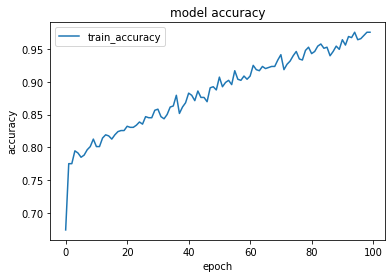

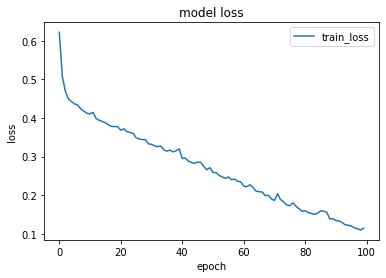

In [32]:
# Plot the model loss of the training data
print(history.history.keys())

#  "Training Accuracy"
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_accuracy'])
plt.show()

#"Training Loss"
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss'])
plt.show()

In [33]:
from sklearn.metrics import classification_report,confusion_matrix
print("Performance Metrics: ")
metrics=classification_report(y_test,y_pred)
print(metrics)
print("Confusion Matrix: ")
CM=confusion_matrix(y_test,y_pred)
print(CM)
print(y_test_hot.ravel().shape)

Performance Metrics: 
              precision    recall  f1-score   support

         0.0       0.75      0.81      0.78        95
         1.0       0.65      0.56      0.60        59

    accuracy                           0.71       154
   macro avg       0.70      0.68      0.69       154
weighted avg       0.71      0.71      0.71       154

Confusion Matrix: 
[[77 18]
 [26 33]]
(308,)


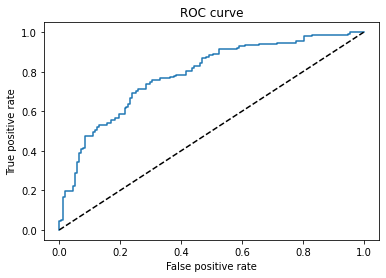

In [34]:
from sklearn.metrics import roc_curve, auc
# y_pred = model.predict(X_test)
fpr, tpr, threshold = roc_curve(y_test_hot.ravel(), y.ravel())
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.show()

Q. 4. Build a CNN model from scratch to recognize human emotion using Facial emotion recognition dataset (FER2013) (https://github.com/gitshanks/fer2013) (split dataset into training dataset (80%) and testing dataset (20%) ). For implementation, use a Adam gradient descent algorithm to learn model with parameters for α = 0.01 and random parameters of the CNN model for the Softmax loss function

(i) Visualize Facial emotion recognition dataset (FER2013).

(ii) Plot a comparative loss curve for at least 200 epochs.

(iii) Print confusion matrix, calculate classification metrics such as precision, recall, f1-score and accuracy on test dataset and ROC curve

(iv) Implement above CNN model with Keras/Tensorflow/Pytorch Library and verify the above results.

In [35]:
data = pd.read_csv('icml_face.csv')
data.columns = ['emotion', 'Usage', 'pixels']
data.head()

,emotion,Usage,pixels
0,0,Training,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,Training,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,Training,231 212 156 164 174 138 161 173 182 200 106 38...
3,4,Training,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,6,Training,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...


In [36]:
data.Usage.value_counts()

Training       28709
PrivateTest     3589
PublicTest      3589
Name: Usage, dtype: int64

In [37]:
def prepare_data(data):
    image_array = np.zeros(shape=(len(data), 48, 48, 1))
    image_label = np.array(list(map(int, data['emotion'])))

    for i, row in enumerate(data.index):
        image = np.fromstring(data.loc[row, 'pixels'], dtype=int, sep=' ')
        image = np.reshape(image, (48, 48)) 
        image_array[i, :, :, 0] = image / 255

    return image_array, image_label



def plot_examples(label):
    fig, axs = plt.subplots(1, 5, figsize=(25, 12))
    fig.subplots_adjust(hspace = .2, wspace=.2)
    axs = axs.ravel()
    for i in range(5):
        idx = data[data['emotion']==label].index[i]
        axs[i].imshow(train_images[idx][:,:,0], cmap='gray')
        axs[i].set_title(emotions[label])
        axs[i].set_xticklabels([])
        axs[i].set_yticklabels([])

        
        
def plot_all_emotions():
    N_train = train_labels.shape[0]

    sel = np.random.choice(range(N_train), replace=False, size=16)

    X_sel = train_images[sel, :, :, :]
    y_sel = train_labels[sel]

    plt.figure(figsize=[12,12])
    for i in range(16):
        plt.subplot(4,4,i+1)
        plt.imshow(X_sel[i,:,:,0], cmap='binary_r')
        plt.title(emotions[y_sel[i]])
        plt.axis('off')
    plt.show()
        
def plot_image_and_emotion(test_image_array, test_image_label, pred_test_labels, image_number):
    """ Function to plot the image and compare the prediction results with the label """
    
    fig, axs = plt.subplots(1, 2, figsize=(12, 6), sharey=False)
    
    bar_label = emotions.values()
    
    axs[0].imshow(test_image_array[image_number], 'gray')
    axs[0].set_title(emotions[test_image_label[image_number]])
    
    axs[1].bar(bar_label, pred_test_labels[image_number], color='orange', alpha=0.7)
    axs[1].grid()
    
    plt.show()
    

    
def vis_training(hlist, start=1):
    
    loss = np.concatenate([h.history['loss'] for h in hlist])
    val_loss = np.concatenate([h.history['val_loss'] for h in hlist])
    acc = np.concatenate([h.history['accuracy'] for h in hlist])
    val_acc = np.concatenate([h.history['val_accuracy'] for h in hlist])
    
    epoch_range = range(1,len(loss)+1)

    plt.figure(figsize=[12,6])
    plt.subplot(1,2,1)
    plt.plot(epoch_range[start-1:], loss[start-1:], label='Training Loss')
    plt.plot(epoch_range[start-1:], val_loss[start-1:], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.legend()

    plt.subplot(1,2,2)
    plt.plot(epoch_range[start-1:], acc[start-1:], label='Training Accuracy')
    plt.plot(epoch_range[start-1:], val_acc[start-1:], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.legend()

    plt.show()

In [38]:
emotions = {0: 'Angry', 1: 'Disgust', 2: 'Fear', 3: 'Happy', 4: 'Sad', 5: 'Surprise', 6: 'Neutral'}

In [39]:
full_train_images, full_train_labels = prepare_data(data[data['Usage']=='Training'])
test_images, test_labels = prepare_data(data[data['Usage']!='Training'])

# full_train_images = full_train_images[0:2000]
# full_train_labels = full_train_labels[0:2000]

# test_images = test_images[0:500]
# test_labels = test_labels[0:500]
print(full_train_images.shape)
print(full_train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(28709, 48, 48, 1)
(28709,)
(7178, 48, 48, 1)
(7178,)


In [40]:
train_images, valid_images, train_labels, valid_labels =\
    train_test_split(full_train_images, full_train_labels, test_size=0.2, random_state=1)

print(train_images.shape)
print(valid_images.shape)
print(train_labels.shape)
print(valid_labels.shape)

(22967, 48, 48, 1)
(5742, 48, 48, 1)
(22967,)
(5742,)


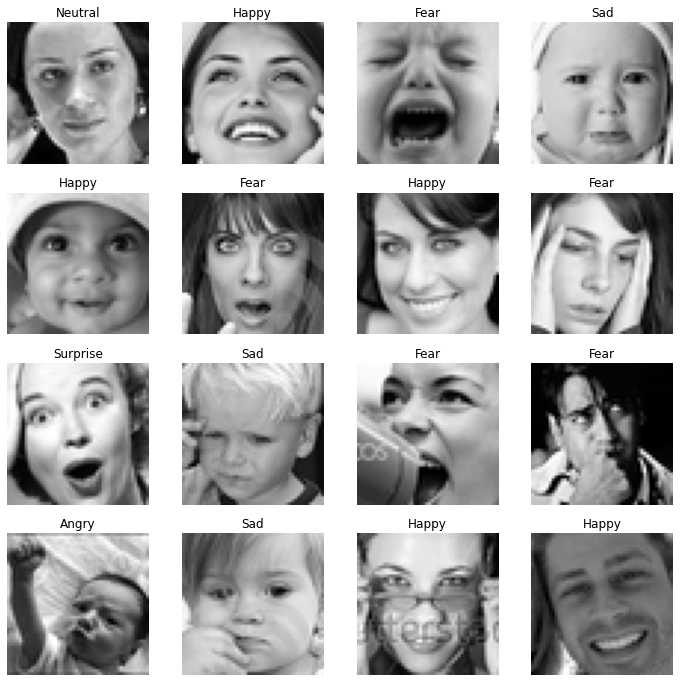

In [41]:
plot_all_emotions()

In [42]:
model = keras.Sequential()

model.add(keras.layers.Conv2D(filters=6, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)))
model.add(keras.layers.AveragePooling2D())
model.add(keras.layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu'))
model.add(keras.layers.AveragePooling2D())

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(units=120, activation='relu'))

model.add(keras.layers.Dense(units=84, activation='relu'))

model.add(keras.layers.Dense(units=7, activation = 'softmax'))

In [43]:
X_train = np.array(train_images)
y_train = np.array(train_labels)
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history = model.fit(X_train,y_train,epochs=30)

Epoch 1/30
718/718 [==============================] - 11s 15ms/step - loss: 1.6837 - accuracy: 0.3274
Epoch 2/30
718/718 [==============================] - 12s 16ms/step - loss: 1.5262 - accuracy: 0.4078
Epoch 3/30
718/718 [==============================] - 13s 18ms/step - loss: 1.4321 - accuracy: 0.4465
Epoch 4/30
718/718 [==============================] - 12s 17ms/step - loss: 1.3622 - accuracy: 0.4735
Epoch 5/30
718/718 [==============================] - 12s 17ms/step - loss: 1.3019 - accuracy: 0.4981
Epoch 6/30
718/718 [==============================] - 12s 17ms/step - loss: 1.2420 - accuracy: 0.5261
Epoch 7/30
718/718 [==============================] - 13s 19ms/step - loss: 1.1823 - accuracy: 0.5498
Epoch 8/30
718/718 [==============================] - 12s 17ms/step - loss: 1.1225 - accuracy: 0.5770
Epoch 9/30
718/718 [==============================] - 12s 17ms/step - loss: 1.0654 - accuracy: 0.6003
Epoch 10/30
718/718 [==============================] - 12s 17ms/step - loss: 1.001

In [46]:
y = model.predict(np.array(test_images))
print(y.shape)

y_pred = []
for l in y:
    y_pred.append(np.argmax(l))
print(np.array(y_pred))
print(test_labels)

(7178, 7)
[4 4 2 ... 4 6 2]
[0 1 4 ... 0 3 2]


In [48]:
# y_pred = cnn.predict(X_test)
score = model.evaluate(test_images, test_labels, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 3.8981568813323975
Test accuracy: 0.4641961455345154


dict_keys(['loss', 'accuracy'])


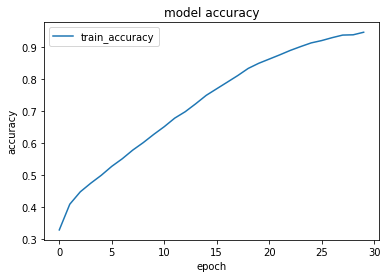

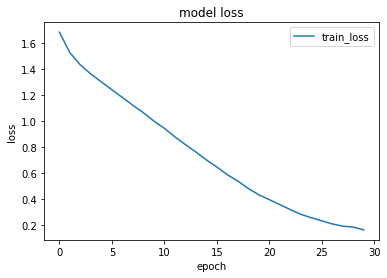

In [49]:
# Plot the model loss of the training data
print(history.history.keys())

#  "Training Accuracy"
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_accuracy'])
plt.show()

#"Training Loss"
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss'])
plt.show()

In [52]:
from sklearn.metrics import classification_report,confusion_matrix
print("Performance Metrics: ")
metrics=classification_report(test_labels,y_pred)
print(metrics)
print("Confusion Matrix: ")
CM=confusion_matrix(test_labels,y_pred)
print(CM)

Performance Metrics: 
              precision    recall  f1-score   support

           0       0.36      0.36      0.36       958
           1       0.49      0.47      0.48       111
           2       0.31      0.41      0.36      1024
           3       0.67      0.63      0.65      1774
           4       0.37      0.31      0.34      1247
           5       0.56      0.63      0.59       831
           6       0.43      0.39      0.41      1233

    accuracy                           0.46      7178
   macro avg       0.46      0.46      0.45      7178
weighted avg       0.47      0.46      0.46      7178

Confusion Matrix: 
[[ 341   15  171   98  155   61  117]
 [  21   52    9    9    7    2   11]
 [ 120   14  423   91  166   97  113]
 [ 120    6  160 1123  110   97  158]
 [ 163    9  260  151  384   85  195]
 [  46    4  148   49   21  523   40]
 [ 128    7  181  164  199   68  486]]
